# Data Description

# Context

# Attribute Information

# Learning Output

# Objective

In [ ]:
#Read the columns descriptions aand ensures you to understand each attributes well.

In [1]:
#Import Liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier


In [2]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [3]:
data.shape

(5000, 14)

In [4]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#Now we going to check null values

In [7]:
data.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#Now we going to check the describe

In [10]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
#Here we have to remove -3 experience this is minus experience but in actually negative experience is not possible.

In [18]:
num=data._get_numeric_data()

In [19]:
num

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [20]:
data[data['Experience']<0]=0

In [21]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,2475.255600,45.083400,20.119600,73.046800,92182.797000,2.366600,1.915792,1.859400,56.045400,0.096000,0.10320,0.06040,0.590800,0.291000
std,1458.007058,12.173351,11.440484,46.479457,9684.939581,1.167937,1.749641,0.856842,101.460724,0.294621,0.30425,0.23825,0.491735,0.454269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,1215.750000,35.000000,10.000000,38.000000,91775.000000,1.000000,0.670000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,2471.500000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000
75%,3737.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.00000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [16]:
#data visulization

<AxesSubplot:title={'center':'Corelations of Attributes'}>

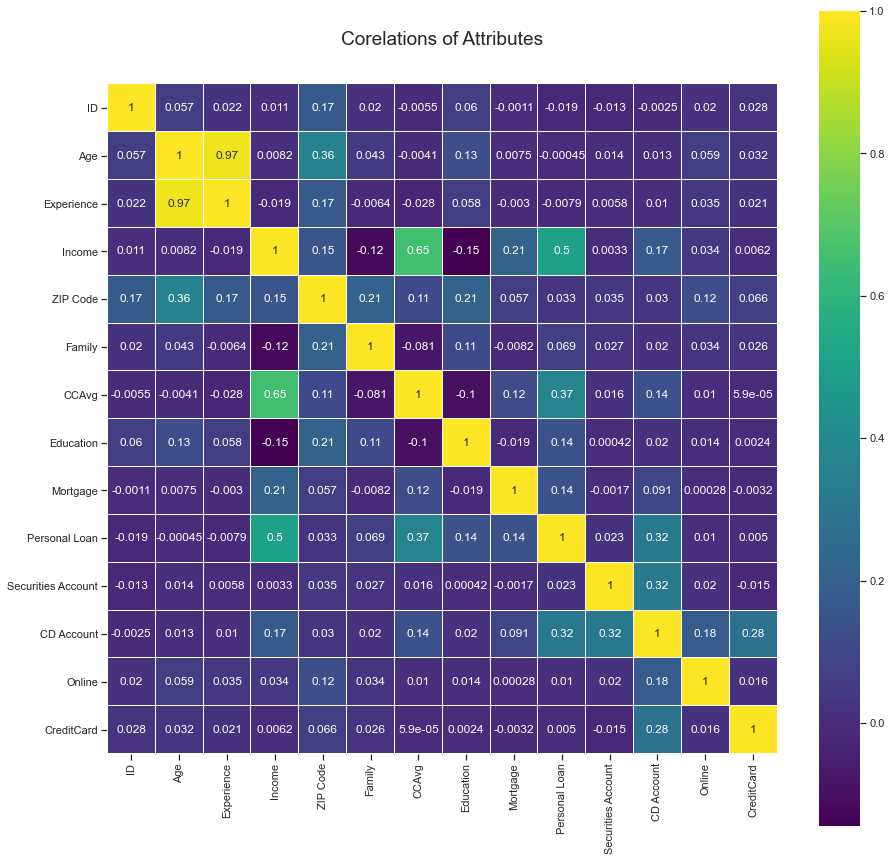

In [24]:
colormap=plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Corelations of Attributes',y=1.05,size=19)
sns.heatmap(data.corr(),linewidth=0.1,vmax=1.0,
           square=True,cmap=colormap,linecolor='white',annot=True)

In [25]:
#1)There is strong positive correlations between age and experience and 
#2)also betwwen CVAvg and income
#3)Negative correlation between Education and Online

In [26]:
#EDA-Exploratory Data Analysis.

In [27]:
data.isnull().sum()#No missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

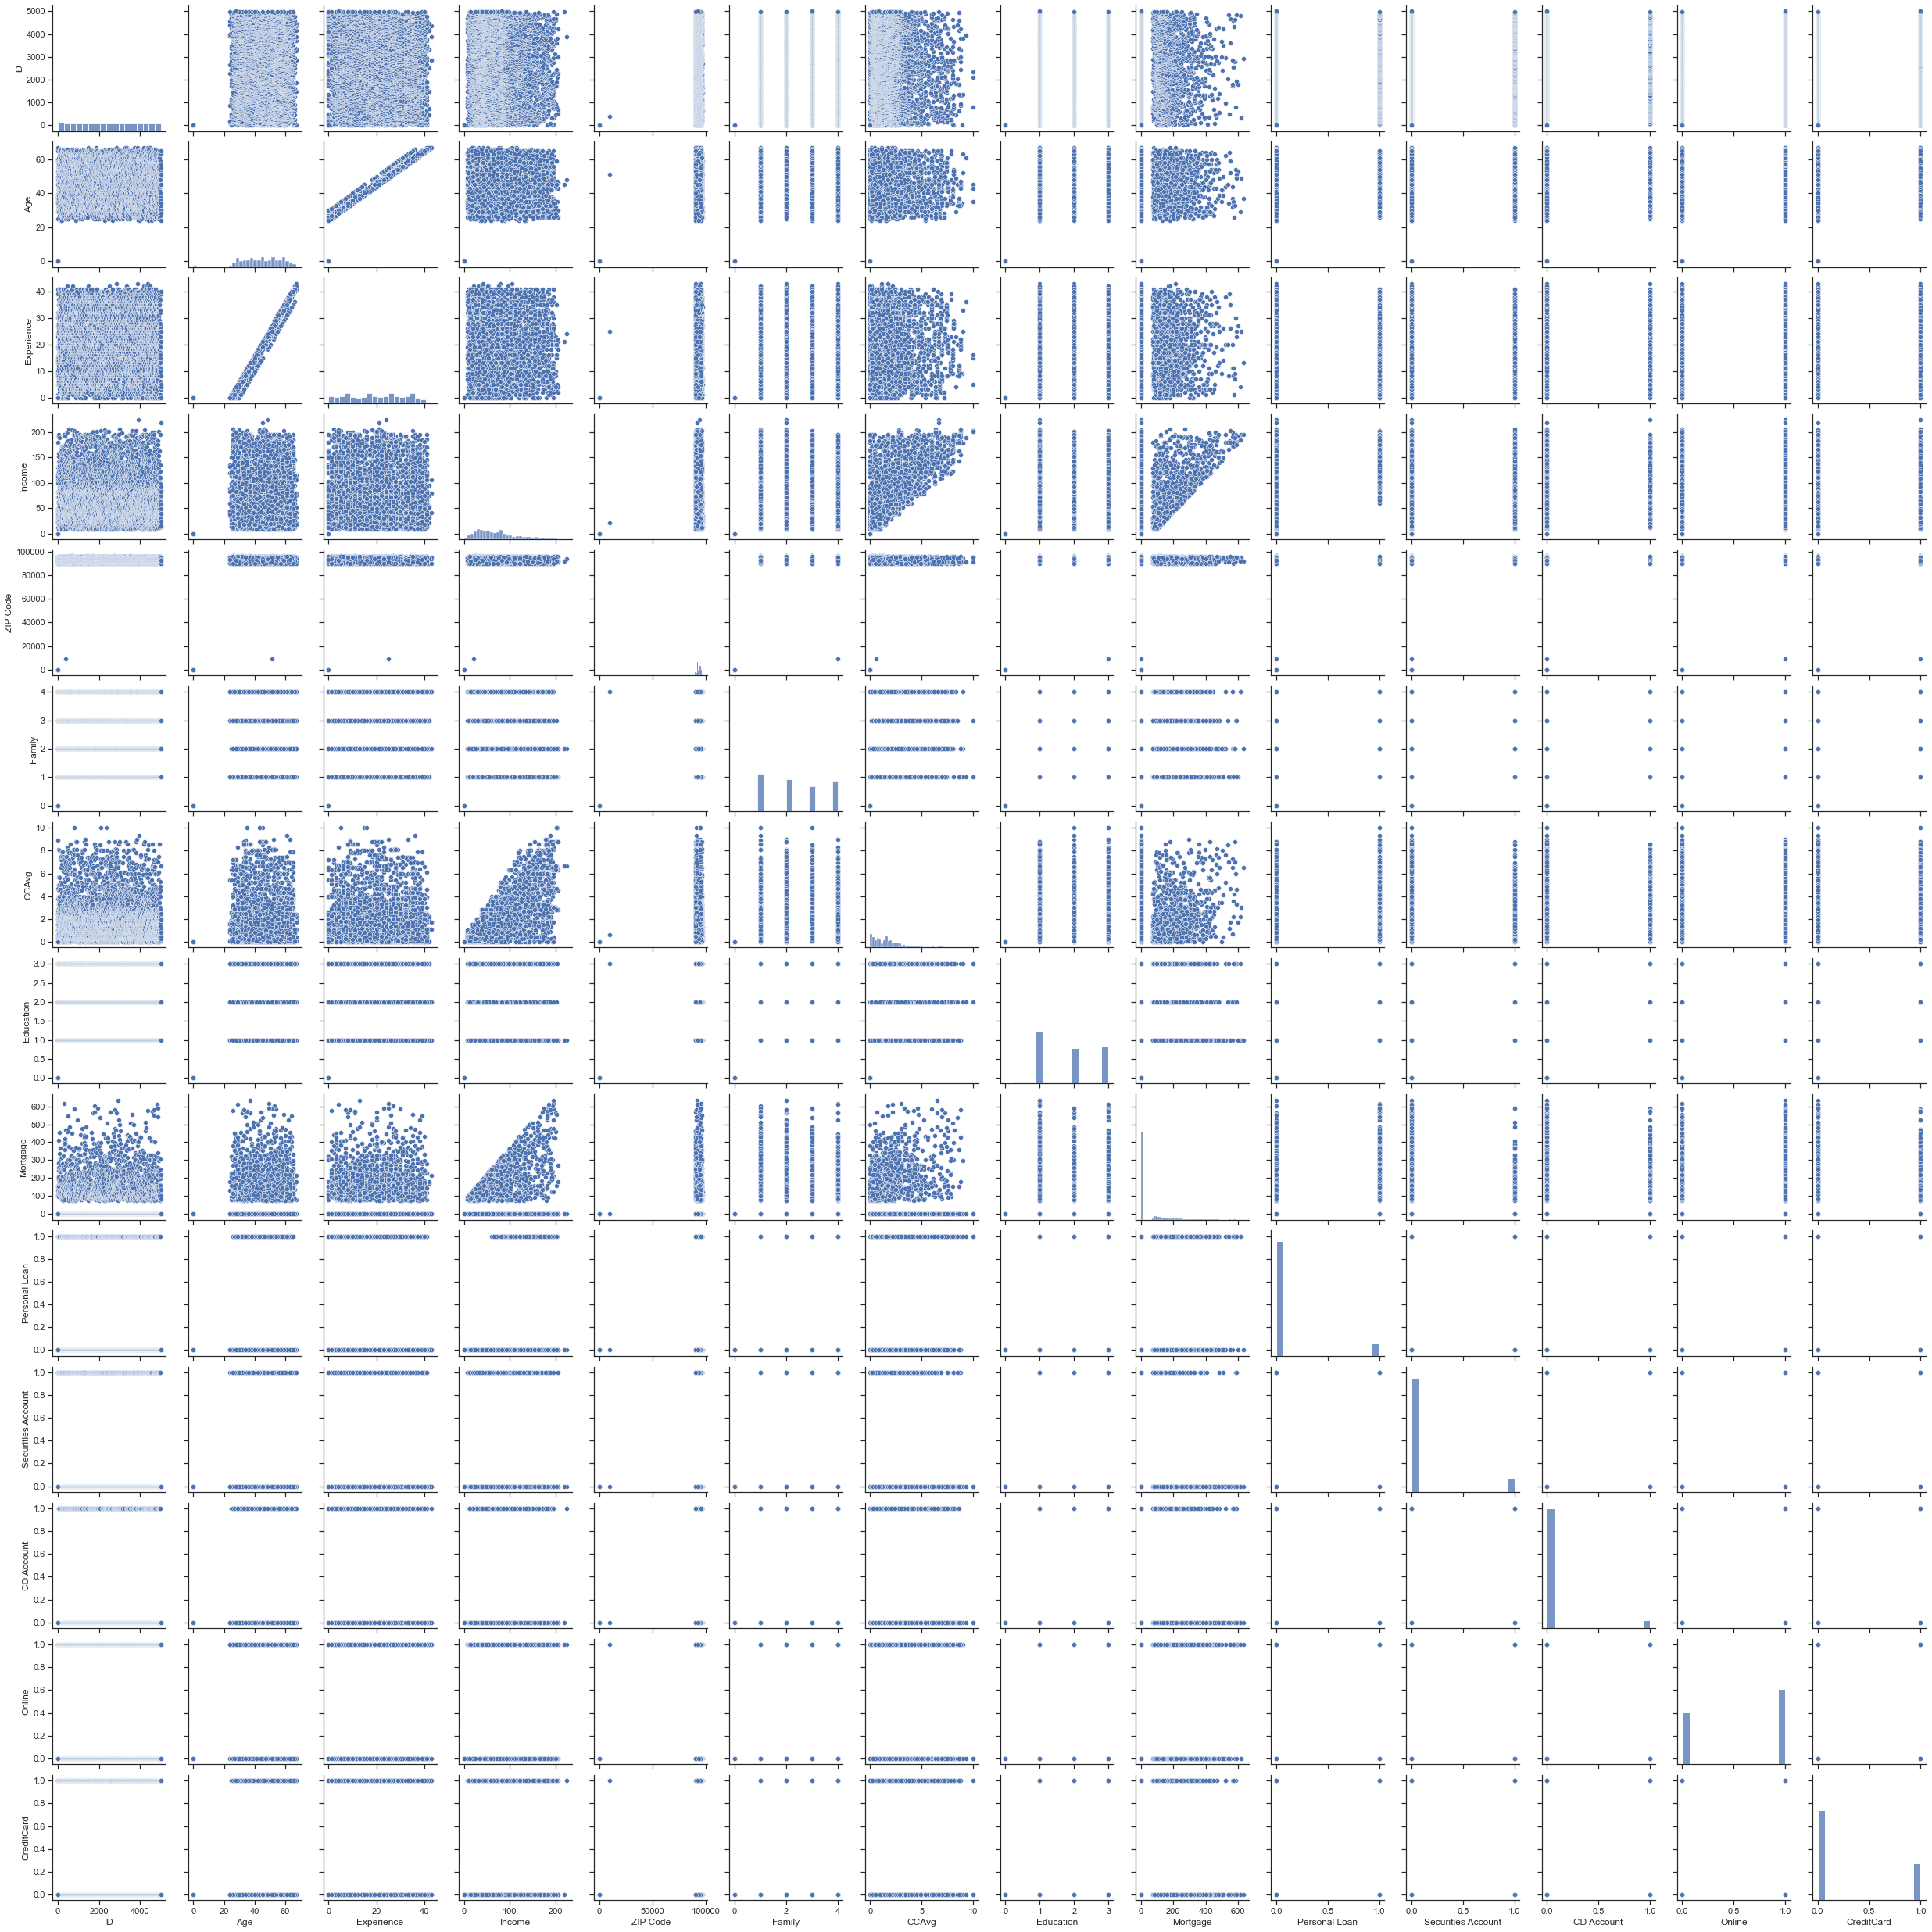

In [28]:
sns.pairplot(data)#plot pair plot it gives hist plot or scatter plot

In [29]:
#Plot 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

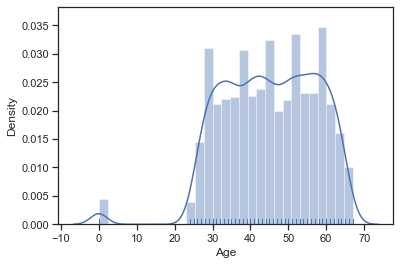

In [30]:
sns.distplot(data['Age'],rug=True)

In [31]:
#We can say the most of the customer are between 30 to 60 years range

<AxesSubplot:xlabel='Education', ylabel='Income'>

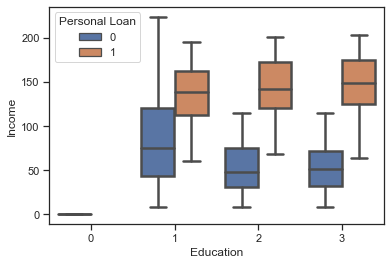

In [32]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data,linewidth=2.5)

In [34]:
#Obsevation
#1)Income of the education level1 people is more than other two
#2)Prefrence of all three level people for personal loan is same

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

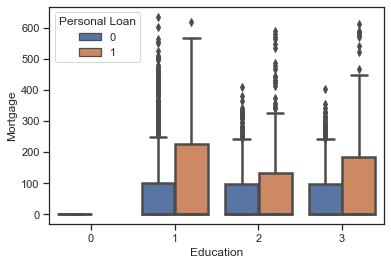

In [40]:
 sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=data,linewidth=2.5)

In [41]:
#Person who taken loan have more mortgage

<AxesSubplot:xlabel='Family', ylabel='count'>

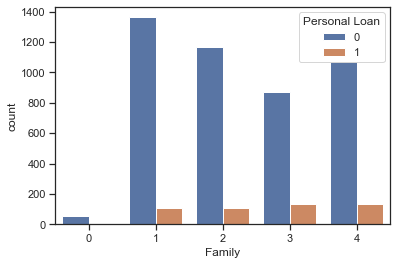

In [43]:
sns.countplot(x='Family',data=data,hue='Personal Loan',orient='v')

In [45]:
#Observation
#No influence of the family members on the personal loan

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

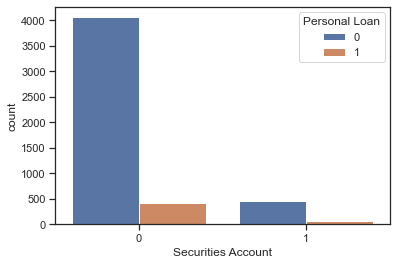

In [47]:
sns.countplot(x='Securities Account',data=data,hue='Personal Loan',orient='v')

In [48]:
#Obsevation
#Majority of customer who does not have loan has security accounts

<AxesSubplot:xlabel='CD Account', ylabel='count'>

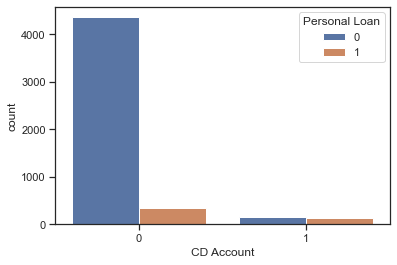

In [49]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan',orient='v')

In [50]:
#Obsevation 
#Those havig CD acounts also not take loan.

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

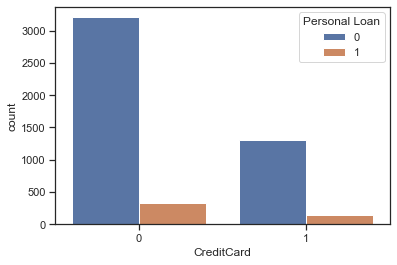

In [52]:
sns.countplot(x='CreditCard',data=data,hue='Personal Loan',orient='v')

In [53]:
#No effect of the credit cards on the personal loan

In [54]:
#Now We train our model.

In [56]:
X=data.drop(['ID','Personal Loan'],axis=1)
y=data['Personal Loan']

In [57]:
X.shape

(5000, 12)

In [58]:
y.shape

(5000,)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [60]:
X_train.shape

(3500, 12)

In [61]:
X_test.shape

(1500, 12)

In [62]:
X_train.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.126000,20.156000,72.571143,92128.928571,2.386571,1.901494,1.860571,55.120286,0.101143,0.057714,0.596000,0.296857
std,12.166435,11.379057,46.234257,9937.931758,1.168067,1.745987,0.858020,99.320803,0.301561,0.233236,0.490768,0.456938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.000000,38.000000,91768.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,63.500000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,100.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
#First Use the decision tree

In [65]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_model.fit(X_train,y_train)
dt_model.score(X_test,y_test)

0.9773333333333334

In [66]:
y_pred=dt_model.predict(X_test)

In [67]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [68]:
#Naive Bayes

In [71]:
naive_model=GaussianNB()
naive_model.fit(X_train,y_train)
naive_model.score(X_test,y_test)

0.8973333333333333

In [72]:
#Random Forest

In [73]:
randomforest_model=RandomForestClassifier(max_depth=2,random_state=0)
randomforest_model.fit(X_train,y_train)
randomforest_model.score(X_test,y_test)

0.9086666666666666

In [74]:
In=pd.DataFrame({'Importance':randomforest_model.feature_importances_*100},index=X_train.columns)

In [75]:
In

,Importance
Age,0.312526
Experience,0.315046
Income,32.328329
ZIP Code,0.794203
Family,3.276033
CCAvg,27.482303
Education,7.810675
Mortgage,8.212060
Securities Account,0.274638
CD Account,18.980103


In [76]:
#KNN

In [77]:
knn=KNeighborsClassifier(n_neighbors=21,weights='uniform')
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.894

In [79]:
#For decision Tree
print(confusion_matrix(y_test,y_pred))

[[1336    6]
 [  28  130]]


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.96      0.82      0.88       158

    accuracy                           0.98      1500
   macro avg       0.97      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [78]:
#Conclusion